# Preprocessing

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.concat([pd.read_csv(f'../../../../data/F_feature_selection/feature_selection-{year}.csv', sep=';') for year in [2019, 2020, 2021, 2022]])
df_test = pd.read_csv('../../../../data/F_feature_selection/feature_selection-2023.csv', sep=';')

In [3]:
columns_to_drop = [
    'latitude', 'longitude',
    'pedestrian_location', 'pedestrian_action',
    'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'age',
    'direction_of_travel_other'
]

object_type = ['role', 'age_group', 'vehicle_category_simplified', 'vehicle_category_simplified_other', 'time_of_day']

na_with_meaning = [
    'fixed_obstacle_struck', 'mobile_obstacle_struck', 'initial_point_of_impact', 'main_maneuver_before_accident', 'motor_type',
    'fixed_obstacle_struck_other', 'mobile_obstacle_struck_other', 'initial_point_of_impact_other', 'main_maneuver_before_accident_other', 'motor_type_other',
    'sex'
]

columns_to_int32 = [
    'location', 'type_of_collision', 'reserved_lane_present', 'horizontal_alignment', 'infrastructure', 'accident_situation', 'position',
    'fixed_obstacle_struck', 'mobile_obstacle_struck', 'initial_point_of_impact', 'main_maneuver_before_accident', 'motor_type', 
    'fixed_obstacle_struck_other', 'mobile_obstacle_struck_other', 'initial_point_of_impact_other', 'main_maneuver_before_accident_other',
    'motor_type_other','vehicle_category_involved_bicycle', 'vehicle_category_involved_bus_coach', 'vehicle_category_involved_hgv_truck',
    'vehicle_category_involved_light_motor_vehicle', 'vehicle_category_involved_other', 'vehicle_category_involved_powered_2_3_wheeler',
    'used_belt', 'used_helmet', 'used_child_restraint', 'used_airbag', 'impact_score', 'impact_score_other', 'impact_delta', 'surface_quality_indicator',
    'lighting_ordinal', 'weather_ordinal', 'injury_target', 'sex', 'day_of_week', 'speed_limit'
]

In [4]:
for x in [df, df_test]:
    # Remove rows or columns with missing values that do not encode info.
    x.drop(columns=columns_to_drop, inplace=True)    
    x.replace(-1, pd.NA, inplace=True)
    x[na_with_meaning] = x[na_with_meaning].fillna(-1)
    x[['vehicle_category_simplified', 'vehicle_category_simplified_other']] = x[['vehicle_category_simplified', 'vehicle_category_simplified_other']].fillna('no vehicle')
    x.dropna(inplace=True)
    x[columns_to_int32] = x[columns_to_int32].astype('int32')
    
    # Drop rows with impossible speed limit
    # France has a maximum speed limit of 130
    x.drop(index=x[x['speed_limit'] > 130].index, inplace=True)
 

C:\Users\David\AppData\Local\Temp\ipykernel_10100\4081092471.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x[na_with_meaning] = x[na_with_meaning].fillna(-1)
C:\Users\David\AppData\Local\Temp\ipykernel_10100\4081092471.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x[na_with_meaning] = x[na_with_meaning].fillna(-1)


In [5]:
num_cols = ['speed_limit', 'day_of_week', 'impact_score', 'impact_score_other', 'impact_delta', 'road_complexity_index', 'surface_quality_indicator', 'lighting_ordinal', 'weather_ordinal']
cat_cols = df.columns.difference(num_cols + ['injury_target'])

In [6]:
X_train = df.drop(columns='injury_target')
y_train = df['injury_target']

X_test = df_test.drop(columns='injury_target')
y_test = df_test['injury_target']

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

In [10]:
# Build preprocessing to numeric space
# pre = ColumnTransformer([
#     ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), [c for c in X_train.columns if c not in num_cols]),
#     ('num', StandardScaler(), num_cols),
# ], remainder='drop')


pre = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), cat_cols),
    ('num_poly', Pipeline(steps=[
        ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
        ('scale', MinMaxScaler())
    ]), num_cols),
], remainder='drop')


X_tr = pre.fit_transform(X_train, y_train)

corr = pd.DataFrame(X_tr, columns=pre.get_feature_names_out()).corrwith(y_train)

c:\Users\David\Desktop\PythonKurs\Data_Mining_I\Project\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\David\Desktop\PythonKurs\Data_Mining_I\Project\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [12]:
pre.get_feature_names_out()

array(['cat__accident_situation_2', 'cat__accident_situation_3',
       'cat__accident_situation_4', 'cat__accident_situation_5',
       'cat__accident_situation_6', 'cat__accident_situation_8',
       'cat__age_group_adult', 'cat__age_group_child_teen',
       'cat__age_group_middle_aged', 'cat__age_group_senior',
       'cat__age_group_young_adult', 'cat__fixed_obstacle_struck_0',
       'cat__fixed_obstacle_struck_1', 'cat__fixed_obstacle_struck_2',
       'cat__fixed_obstacle_struck_3', 'cat__fixed_obstacle_struck_4',
       'cat__fixed_obstacle_struck_5', 'cat__fixed_obstacle_struck_6',
       'cat__fixed_obstacle_struck_7', 'cat__fixed_obstacle_struck_8',
       'cat__fixed_obstacle_struck_9', 'cat__fixed_obstacle_struck_10',
       'cat__fixed_obstacle_struck_11', 'cat__fixed_obstacle_struck_12',
       'cat__fixed_obstacle_struck_13', 'cat__fixed_obstacle_struck_14',
       'cat__fixed_obstacle_struck_15', 'cat__fixed_obstacle_struck_16',
       'cat__fixed_obstacle_struck_17',

C:\Users\David\AppData\Local\Temp\ipykernel_10100\3498247791.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=s, x='corr', y='feature', palette='vlag')


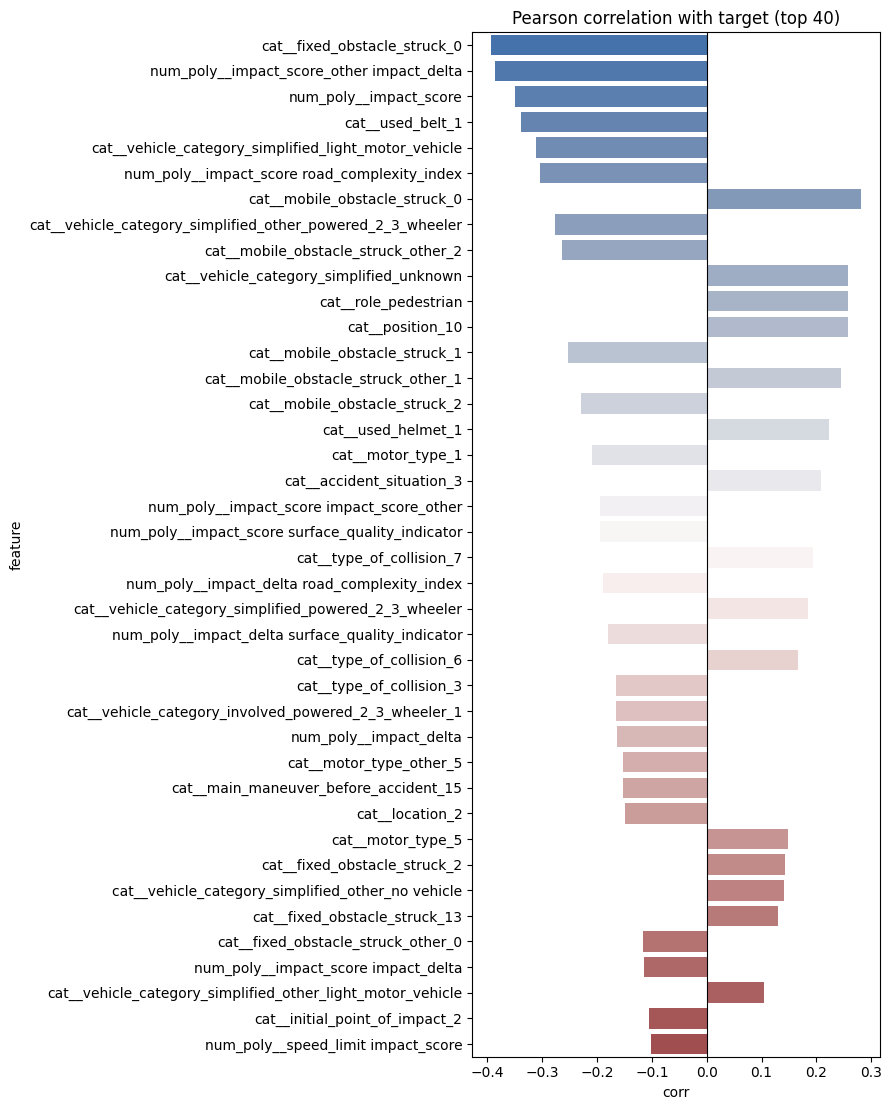

C:\Users\David\AppData\Local\Temp\ipykernel_10100\3498247791.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=s, x='corr', y='feature', palette='vlag')


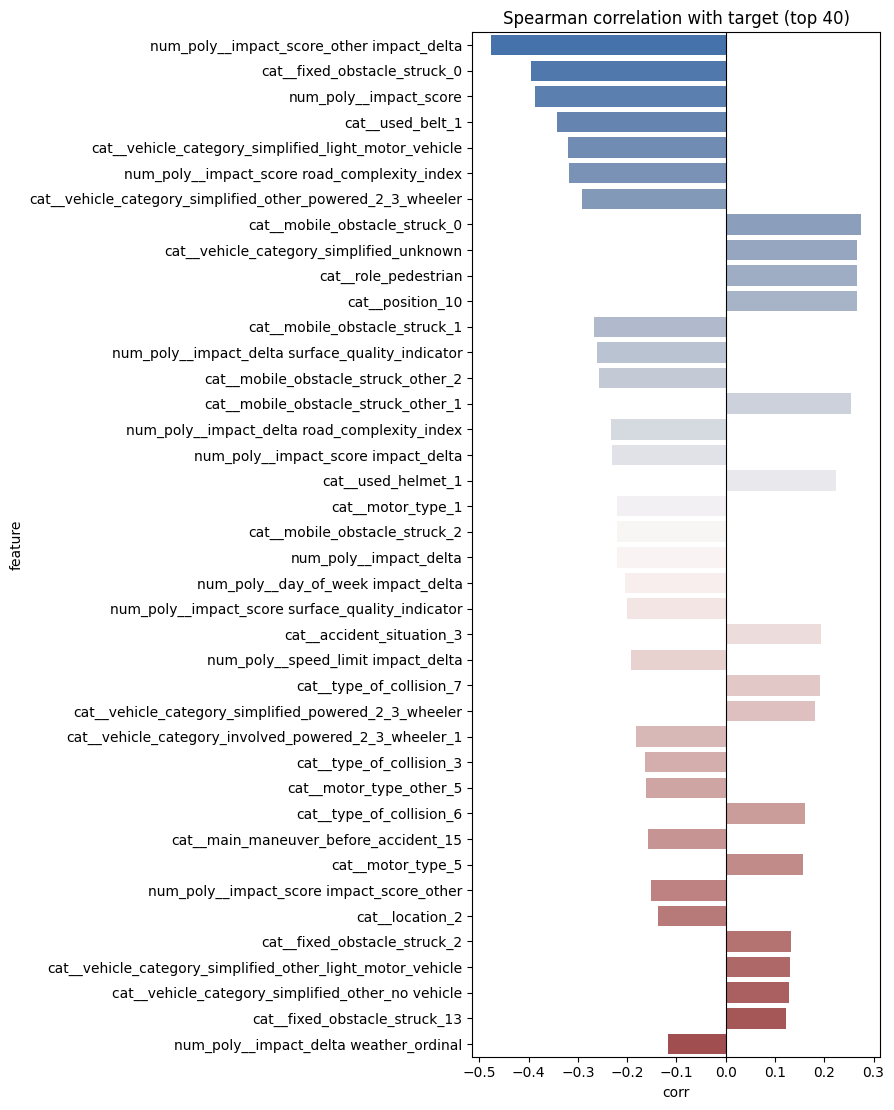

In [11]:
# Correlation with the target (Pearson/Spearman) + bar plots
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

X_df = pd.DataFrame(X_tr, columns=pre.get_feature_names_out(), index=X_train.index)

corr_p = X_df.corrwith(y_train, method='pearson')
corr_s = X_df.corrwith(y_train, method='spearman')

def plot_corr(c, title, top=40):
    s = c.sort_values(key=np.abs, ascending=False).head(top).rename('corr').reset_index().rename(columns={'index':'feature'})
    plt.figure(figsize=(9, 0.28*len(s)))
    sns.barplot(data=s, x='corr', y='feature', palette='vlag')
    plt.axvline(0, color='k', lw=0.8)
    plt.title(title); plt.tight_layout(); plt.show()

plot_corr(corr_p, 'Pearson correlation with target (top 40)')
plot_corr(corr_s, 'Spearman correlation with target (top 40)')

# Feature Engineering

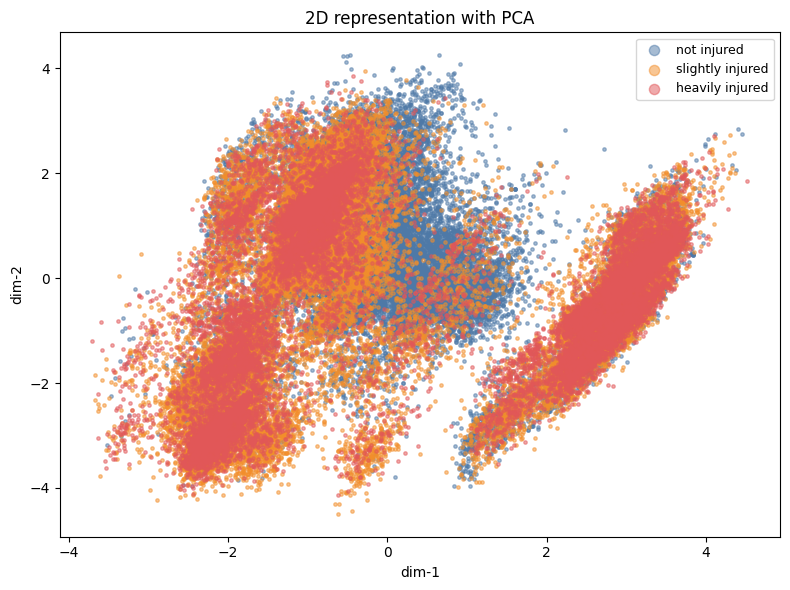

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Build preprocessing to numeric space
pre = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), [c for c in X_train.columns if c not in num_cols]),
    ('num', StandardScaler(), num_cols),
], remainder='drop')

X_train_num = pre.fit_transform(X_train, y_train)

# Choose method: 'pca', 'tsne'
method = 'pca'  # change to 'tsne' or 'umap' as needed
rs = 42

if method == 'pca':
    reducer = PCA(n_components=2, random_state=rs)
    Z = reducer.fit_transform(X_train_num)
elif method == 'tsne':
    # t-SNE can be slow; consider subsampling for very large datasets
    reducer = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=rs, verbose=0, n_jobs=-1)
    Z = reducer.fit_transform(X_train_num)
else:
    raise ValueError("Set method to 'pca', 'tsne', or 'umap' (install umap-learn).")

# Optional: subsample for plotting speed
max_points = 100000
if Z.shape[0] > max_points:
    rng = np.random.RandomState(rs)
    idx = rng.choice(Z.shape[0], size=max_points, replace=False)
    Zp = Z[idx]
    yp = y_train.iloc[idx].to_numpy()
else:
    Zp = Z
    yp = y_train.to_numpy()

# Prepare a small helper for labels/colors
label_names = {0:'not injured', 1:'slightly injured', 2:'heavily injured'}
colors = {0:'#4e79a7', 1:'#f28e2b', 2:'#e15759'}

plt.figure(figsize=(8, 6))
for k in sorted(np.unique(yp)):
    m = (yp == k)
    plt.scatter(Zp[m, 0], Zp[m, 1], s=6, alpha=0.5, c=colors.get(k, '#888888'), label=label_names.get(k, str(k)))
plt.title(f'2D representation with {method.upper()}')
plt.xlabel('dim-1')
plt.ylabel('dim-2')
plt.legend(markerscale=3, fontsize=9, frameon=True)
plt.tight_layout()
plt.show()

# Keep for later use if needed
embed_2d = pd.DataFrame({'x': Z[:, 0], 'y': Z[:, 1], 'label': y_train.to_numpy()})

In [ ]:
# Autoencoder -> 3D latent embedding

import numpy as np
import pandas as pd

# Ensure we have numeric matrix and labels (re-use your preprocessing)
# X_all_num: numeric array from ColumnTransformer
# y_all: labels concatenated from train/test
# assert 'X_all_num' in globals() and 'y_all' in globals(), "Run the preprocessing cell that builds X_all_num and y_all first."

# Install/import TF before this cell; restart kernel after installing GPU support.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras import mixed_precision


# Build preprocessing to numeric space
pre = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), [c for c in X_train.columns if c not in num_cols]),
    ('num', StandardScaler(), num_cols),
], remainder='drop')

X_train_num = pre.fit_transform(X_train, y_train)


print('TF:', tf.__version__, 'Built with CUDA:', tf.test.is_built_with_cuda())
gpus = tf.config.list_physical_devices('GPU')
print('GPUs:', gpus)
for gpu in gpus:
    try:
        tf.config.experimental.set_memory_growth(gpu, True)
    except Exception as e:
        print('Memory growth not set:', e)

# Mixed precision (speeds up on modern GPUs)
mixed_precision.set_global_policy('mixed_float16')

tf.random.set_seed(42)
np.random.seed(42)

Xn = X_train_num.astype('float32')
input_dim = Xn.shape[1]

# Encoder
inp = keras.Input(shape=(input_dim,), name='inp')
x = layers.Dense(input_dim, activation='relu', kernel_regularizer=regularizers.l2(1e-3))(inp)
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
latent = layers.Dense(3, name='latent')(x)  # stays float16 under policy

# Decoder
x = layers.Dense(64, activation='relu')(latent)
x = layers.Dense(input_dim, activation='relu')(x)

# IMPORTANT: final layer to float32 for stable MSE when using mixed precision
out = layers.Dense(input_dim, activation='linear', dtype='float32', name='recon')(x)

encoder = keras.Model(inp, latent, name='encoder')
autoenc = keras.Model(inp, out, name='autoencoder')

# Use CUDA + XLA JIT
autoenc.compile(optimizer=keras.optimizers.Adam(1e-3), loss='mse', jit_compile=True)

es = callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
rlrop = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

with tf.device('/GPU:0'):
    hist = autoenc.fit(
        Xn, Xn,
        epochs=100,
        batch_size=3000,   # raise if VRAM allows, lower if OOM
        shuffle=True,
        validation_split=0.1,
        callbacks=[es, rlrop],
        verbose=1
    )

with tf.device('/GPU:0'):
    Z = encoder.predict(Xn, batch_size=4096)
Z = Z.astype('float32')

# Optional: subsample for plotting speed
rs = 42
max_points = 100000
if Z.shape[0] > max_points:
    rng = np.random.RandomState(rs)
    idx = rng.choice(Z.shape[0], size=max_points, replace=False)
    Zp = Z[idx]
    yp = y_train.iloc[idx].to_numpy()
else:
    Zp = Z
    yp = y_train.to_numpy()

# Matplotlib 3D scatter
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import matplotlib.pyplot as plt

label_names = {0:'not injured', 1:'slightly injured', 2:'heavily injured'}
colors = {0:'#4e79a7', 2:'#f28e2b', 3:'#e15759'}

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
for k in sorted(np.unique(yp)):
    m = (yp == k)
    ax.scatter(Zp[m, 0], Zp[m, 1], Zp[m, 2], s=6, alpha=0.5,
               c=colors.get(k, '#888888'), label=label_names.get(k, str(k)))

ax.set_title('3D representation with Autoencoder')
ax.set_xlabel('z1'); ax.set_ylabel('z2'); ax.set_zlabel('z3')
ax.view_init(elev=30, azim=45)
ax.legend(markerscale=3, fontsize=9, frameon=True)
plt.tight_layout()
plt.show()

# Optional Plotly (interactive rotate)
import plotly.express as px
df_plot = pd.DataFrame({'x': Zp[:,0], 'y': Zp[:,1], 'z': Zp[:,2], 'label': yp})
df_plot['label_name'] = df_plot['label'].map(label_names)
fig = px.scatter_3d(df_plot, x='x', y='y', z='z', color='label_name',
                    color_discrete_map={'not injured': colors[1], 'slightly injured': colors[2],
                                       'heavily injured': colors[3], 'killed': colors[4]},
                    opacity=0.6)
fig.update_traces(marker=dict(size=2))
fig.update_layout(title='3D representation with Autoencoder')
fig.show()

# Save embedding for later use
embed_3d_ae = pd.DataFrame({'x': Z[:,0], 'y': Z[:,1], 'z': Z[:,2], 'label': y_train.to_numpy()})

TF: 2.20.0 Built with CUDA: True
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1762719151.590233    4673 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1768 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-11-09 21:12:36.547293: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 378430692 exceeds 10% of free system memory.
2025-11-09 21:12:37.087123: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 378430692 exceeds 10% of free system memory.
2025-11-09 21:12:37.615369: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 378430692 exceeds 10% of free system memory.
2025-11-09 21:12:37.749638: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 378430692 exceeds 10% of free system memory.


Epoch 1/100


2025-11-09 21:12:43.122937: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f4b70033cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-09 21:12:43.122986: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-11-09 21:12:44.397848: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-09 21:12:46.152761: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91500
2025-11-09 21:12:51.248010: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_247', 176 bytes spill stores, 176 bytes spill loads

2025-11-09 21:12:51.386632: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc

  5/126 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1165

I0000 00:00:1762719183.252307    5010 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


122/126 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0775

2025-11-09 21:13:07.322654: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_247', 176 bytes spill stores, 176 bytes spill loads

2025-11-09 21:13:07.400242: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_772', 412 bytes spill stores, 592 bytes spill loads

2025-11-09 21:13:07.518884: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_512', 564 bytes spill stores, 420 bytes spill loads

2025-11-09 21:13:07.813792: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_247', 16 bytes spill stores, 16 bytes spill loads

2025-11-09 21:13:08.313982: I external

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0769

2025-11-09 21:15:59.091920: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module gemm_fusion_dot.64] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-11-09 21:15:59.824752: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module gemm_fusion_dot.64] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-11-09 21:16:00.539030: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module gemm_fusion_dot.77] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-11-09 21:16:01.603843: E external/local_xla/xla/service/

: 